--2025-08-16 18:14:54--  https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27211011 (26M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  25.95M   120MB/s    in 0.2s    

2025-08-16 18:14:54 (120 MB/s) - ‘data.csv’ saved [27211011/27211011]

Dataset shape: (169909, 19)
                       id                                           name  \
0  6KbQ3uYMLKb5jDxLF7wYDD                    Singende Bataillone 1. Teil   
1  6KuQTIu1KoTTkLXKrwlLPV       Fantasiestücke, Op. 111: Più tosto lento   
2  6L63VW0PibdM1HDSBoqnoM                 Chapter 1.18 - Zamek kaniowski   
3  6M94FkXd15sOAOQYRnWPN8  Bebamos Juntos - Instrumental (Remasterizado)   
4  6N6ti

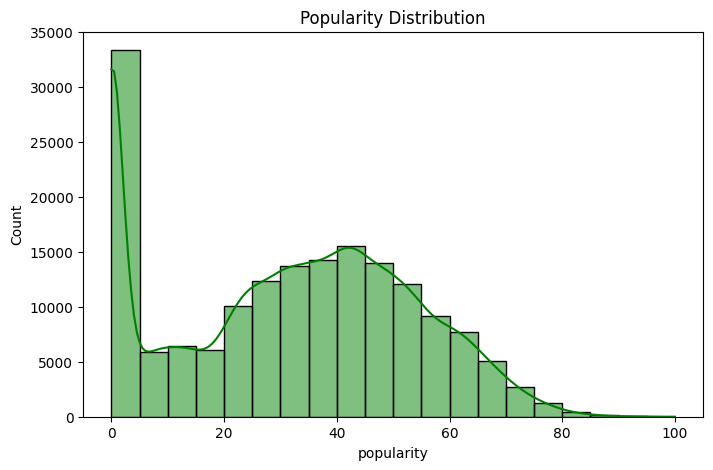

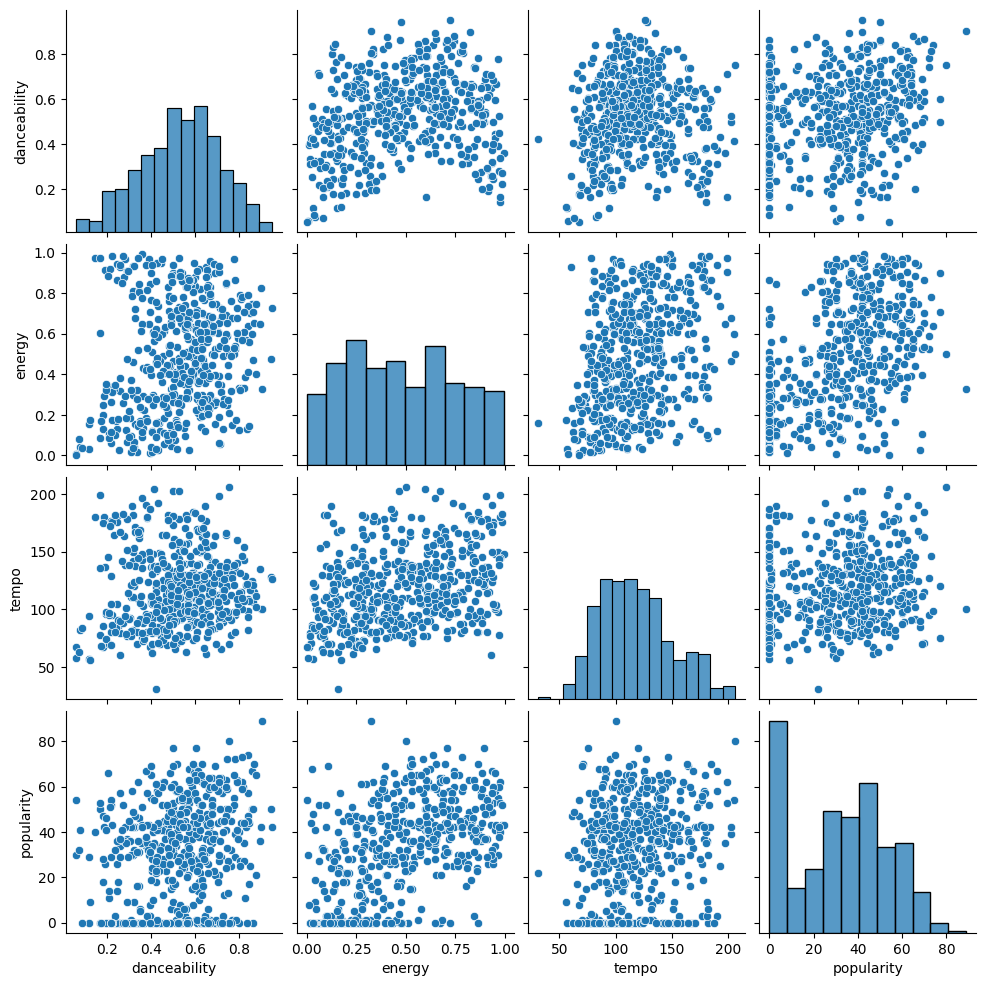

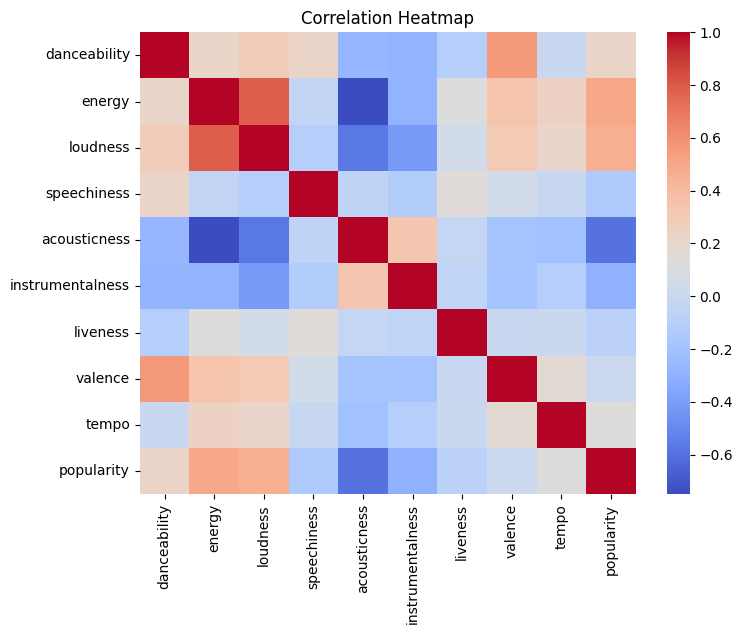

   popularity  hit
0           0    0
1           0    0
2           0    0
3           0    0
4           1    0
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     49630
           1       0.31      0.03      0.05      1343

    accuracy                           0.97     50973
   macro avg       0.64      0.51      0.52     50973
weighted avg       0.96      0.97      0.96     50973

Confusion Matrix:
 [[49548    82]
 [ 1307    36]]


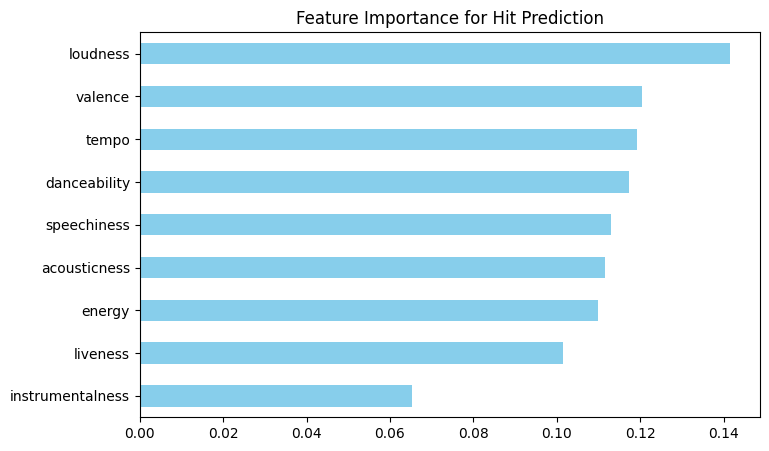

In [10]:
# =========================================
# Spotify Songs EDA + Hit Prediction (via GitHub CSV Link)
# =========================================

# Step 1: Install dependencies
!pip install scikit-learn pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Download Dataset from GitHub
!wget -O data.csv "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"

# Step 3: Load Data
df = pd.read_csv("data.csv", low_memory=False)
print("Dataset shape:", df.shape)
print(df.head())

# Step 4: Select relevant audio features + popularity
features = ['danceability','energy','loudness','speechiness','acousticness',
            'instrumentalness','liveness','valence','tempo','popularity']
df = df[features].dropna()

# Step 5: EDA
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=20, kde=True, color='green')
plt.title("Popularity Distribution")
plt.show()

sns.pairplot(df[['danceability','energy','tempo','popularity']].sample(500))
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Define "Hit Song"
df['hit'] = df['popularity'].apply(lambda x: 1 if x >= 70 else 0)
print(df[['popularity','hit']].head())

# Step 7: Train ML Model
X = df.drop(columns=['popularity','hit'])
y = df['hit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Feature Importance for Hit Prediction")
plt.show()

